<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Packages-import" data-toc-modified-id="Packages-import-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Packages import</a></span></li><li><span><a href="#Data-loading-for-ML" data-toc-modified-id="Data-loading-for-ML-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data loading for ML</a></span><ul class="toc-item"><li><span><a href="#Read-train/test-datasets" data-toc-modified-id="Read-train/test-datasets-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Read train/test datasets</a></span></li><li><span><a href="#LabelEncoder-of-the-target" data-toc-modified-id="LabelEncoder-of-the-target-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>LabelEncoder of the target</a></span></li></ul></li><li><span><a href="#NN-Keras-model-using-Transfer-Learning" data-toc-modified-id="NN-Keras-model-using-Transfer-Learning-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>NN Keras model using Transfer Learning</a></span><ul class="toc-item"><li><span><a href="#Imbalance-management" data-toc-modified-id="Imbalance-management-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Imbalance management</a></span></li><li><span><a href="#Train-Data-splitted-and-maket-it-compatible-with-Keras-NN" data-toc-modified-id="Train-Data-splitted-and-maket-it-compatible-with-Keras-NN-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Train Data splitted and maket it compatible with Keras NN</a></span></li><li><span><a href="#Define-model----Trainable-=-False" data-toc-modified-id="Define-model----Trainable-=-False-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Define model -  Trainable = False</a></span></li><li><span><a href="#Model-compiler" data-toc-modified-id="Model-compiler-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Model compiler</a></span></li><li><span><a href="#Fit-Model" data-toc-modified-id="Fit-Model-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Fit Model</a></span></li><li><span><a href="#Train/validation-error-history" data-toc-modified-id="Train/validation-error-history-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Train/validation error history</a></span></li></ul></li><li><span><a href="#Performance-on-test-dataset" data-toc-modified-id="Performance-on-test-dataset-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Performance on test dataset</a></span></li><li><span><a href="#create-output-csv" data-toc-modified-id="create-output-csv-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>create output csv</a></span></li></ul></div>

## Packages import

In [1]:
# Import base packages
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Import DL packages
import tensorflow as tf
print(f'TensorFlow version: {tf.__version__}')
print(f'Keras version: {tf.keras.__version__}')
import tensorflow_hub as hub
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

TensorFlow version: 2.3.1
Keras version: 2.4.0


In [2]:
 # initialize the seed
SEED = 42

tf.keras.backend.clear_session()
from numpy import random as np_random
np_random.seed(SEED)
from tensorflow import random as tf_random
tf_random.set_seed(SEED)

## Data loading for ML

### Read train/test datasets


In [3]:
def read_data(dataset_path):
    df = pd.read_csv(dataset_path,  sep=',')
    df = df[['rca_content_nlp','root_cause_category']] 
    return df

In [4]:
train_path = 'data_generated_ml/p1Rca_nlp.csv'
test_path = 'data_generated_ml/p1Rca_test_nlp.csv'

train_data = read_data(train_path)
#train_data.name = 'train_data'
test_data = read_data(test_path)
test_data.name = 'test_data'
#train_data

<AxesSubplot:>

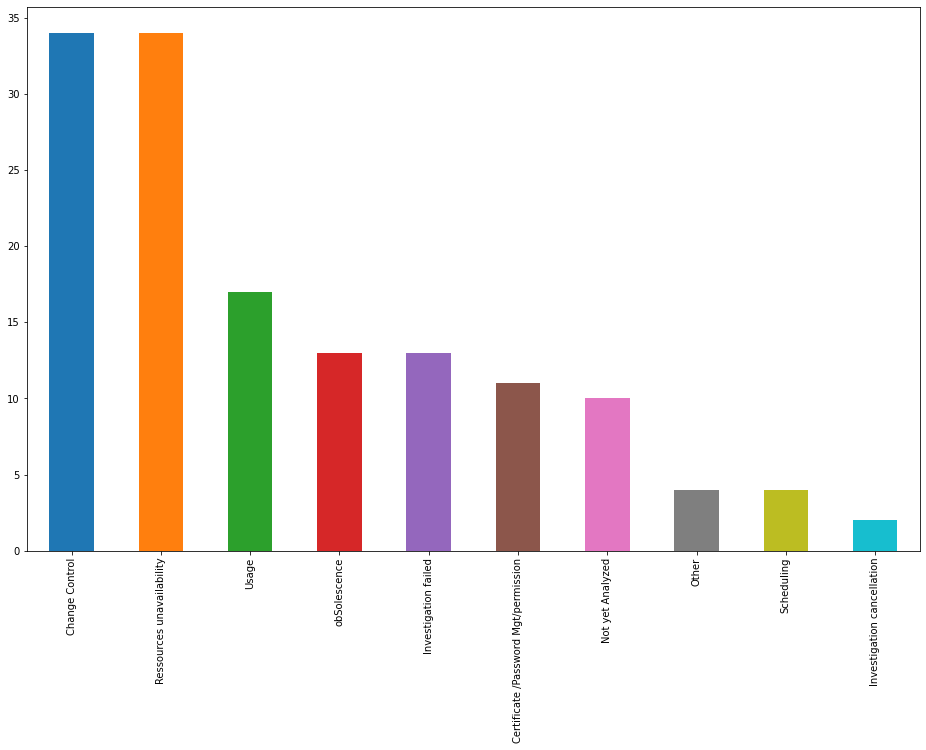

In [5]:
df = train_data['root_cause_category'].value_counts()
df.plot.bar(figsize=(16,10))

In [6]:
train_data = train_data[['rca_content_nlp','root_cause_category']]
train_data

,rca_content_nlp,root_cause_category
0,siemens ticket open problem communication orac...,Ressources unavailability
1,file miss idea path server luzsappidap miss fi...,Change Control
2,infor eam could communicate oracle server orac...,Ressources unavailability
3,faulty hardware component sfp cable vcm perfor...,Ressources unavailability
4,analysis support scallog indeed restart applic...,Ressources unavailability
5,slot block perform tray release unlocked,Usage
6,problem move file directory /xfp/sanofi/etudes...,Scheduling
7,geode+ team confirm document xml publish end a...,obSolescence
8,unable consumption trpg plant waighing idoc in...,Investigation failed
9,due change implement me issue incorrect quanti...,Change Control


In [7]:
 len(train_data['root_cause_category'].unique())

10

### LabelEncoder of the target

In [8]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(train_data['root_cause_category'])
train_data['root_cause_category_le'] = le.transform(train_data['root_cause_category'])
test_data['root_cause_category_le'] = le.transform(test_data['root_cause_category'])

display(train_data.head())
display(test_data.head())


,rca_content_nlp,root_cause_category,root_cause_category_le
0,siemens ticket open problem communication orac...,Ressources unavailability,6
1,file miss idea path server luzsappidap miss fi...,Change Control,1
2,infor eam could communicate oracle server orac...,Ressources unavailability,6
3,faulty hardware component sfp cable vcm perfor...,Ressources unavailability,6
4,analysis support scallog indeed restart applic...,Ressources unavailability,6


,rca_content_nlp,root_cause_category,root_cause_category_le
0,primary issue xspw print service start automat...,Investigation failed,3
1,cluster service fail unknown reason cluster ru...,obSolescence,9
2,perform oracle team reveal issue disc inaccess...,obSolescence,9
3,master application use ldap web service url us...,Ressources unavailability,6
4,finding investigate production case serial go ...,Change Control,1


## NN Keras model using Transfer Learning

### Imbalance management

In [9]:
X = train_data['rca_content_nlp'].copy()
y = train_data['root_cause_category_le'].copy()

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X1, y1 = sm.fit_sample(X, y)
print ('X1: ',X1.shape)
print ('y1: ',y1.shape)

### Train Data splitted and maket it compatible with Keras NN  

In [10]:
test_size=0.2

In [11]:
x_train, x_valid, y_train, y_valid = train_test_split(X,y, test_size=test_size, random_state=42)

In [12]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train, 10)
y_valid = to_categorical(y_valid, 10)

### Define model -  Trainable = False
Now you should define your NN structure using Keras sequential layers. Your base model will come from TensorFlow Hub with source url https://tfhub.dev/google/universal-sentence-encoder/4.
To import this base model in your structure, you must use hub.KerasLayer function (https://www.tensorflow.org/hub/api_docs/python/hub/KerasLayer). You should add following parameters:
- input_shape = []
- dtype = tf.string
- trainable = False

Please note this trainable option that allows to retrain the entire NN or not.

In [13]:
model_tf ="https://tfhub.dev/google/universal-sentence-encoder/4"
#model_tf ="https://tfhub.dev/google/universal-sentence-encoder-large/5"
#model_tf ='https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1'
trainable = False
epochs= 500
dropout = 0.5

In [14]:
#reg = regularizers.L2(0.05)
model = tf.keras.Sequential([
        hub.KerasLayer(hub.load(model_tf), input_shape = [], dtype = tf.string, trainable = trainable),
#         Dropout(dropout),
#         Dense(513, activation='relu'),
#         Dropout(dropout),
#         Dense(513/2, activation='relu'),
        Dropout(dropout),
        #Dense(10,activation ='softmax', kernel_regularizer = reg)
        Dense(10,activation ='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 512)               256797824 
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                5130      
Total params: 256,802,954
Trainable params: 5,130
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
#Best result
model_tf ="https://tfhub.dev/google/universal-sentence-encoder/4"
trainable = False
epochs= 500
dropout = 0.5
model = tf.keras.Sequential([
        hub.KerasLayer(hub.load(model_tf), input_shape = [], dtype = tf.string, trainable = trainable),
        Dropout(dropout),
        Dense(10,activation ='softmax')
])

model.summary()

### Model compiler
Compile your Keras model using an Adam optimizer, binary crossentropy for the loss and accuracy as the target metric

In [15]:
model.compile(optimizer="Adam", loss="categorical_crossentropy", metrics="accuracy")

### Fit Model 
Split your training data into x_train, x_valid, y_train, y_valid using sklearn function. Test size must be set to 0.3 and the repartition of the target variable should be similar between your valid and training samples.

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1,patience=50)
history = model.fit(x=x_train, y=  y_train, validation_data =(x_valid,y_valid),epochs=200, callbacks=[es])

Now you can train your NN by providing your training and valid datasets. Number of epochs can be set to 5 for now. You need to save the model fit output into history variable, so we can plot the loss later.

In [16]:
history = model.fit(x=x_train, y=  y_train, validation_data =(x_valid,y_valid),epochs=epochs)

Epoch 1/500
4/4 [==============================] - 1s 178ms/step - loss: 2.3126 - accuracy: 0.0442 - val_loss: 2.2986 - val_accuracy: 0.0690
Epoch 2/500
4/4 [==============================] - 0s 27ms/step - loss: 2.2857 - accuracy: 0.1416 - val_loss: 2.2871 - val_accuracy: 0.1379
Epoch 3/500
4/4 [==============================] - 0s 30ms/step - loss: 2.2559 - accuracy: 0.1947 - val_loss: 2.2761 - val_accuracy: 0.2069
Epoch 4/500
4/4 [==============================] - ETA: 0s - loss: 2.2403 - accuracy: 0.21 - 0s 36ms/step - loss: 2.2392 - accuracy: 0.2301 - val_loss: 2.2654 - val_accuracy: 0.2414
Epoch 5/500
4/4 [==============================] - 0s 27ms/step - loss: 2.2248 - accuracy: 0.2124 - val_loss: 2.2552 - val_accuracy: 0.2759
Epoch 6/500
4/4 [==============================] - 0s 24ms/step - loss: 2.1978 - accuracy: 0.2743 - val_loss: 2.2456 - val_accuracy: 0.3103
Epoch 7/500
4/4 [==============================] - 0s 25ms/step - loss: 2.1755 - accuracy: 0.3540 - val_loss: 2.2363 

Epoch 59/500
4/4 [==============================] - 0s 31ms/step - loss: 1.6792 - accuracy: 0.5398 - val_loss: 2.0983 - val_accuracy: 0.3448
Epoch 60/500
4/4 [==============================] - 0s 41ms/step - loss: 1.6633 - accuracy: 0.5133 - val_loss: 2.0981 - val_accuracy: 0.3448
Epoch 61/500
4/4 [==============================] - 0s 37ms/step - loss: 1.6676 - accuracy: 0.5575 - val_loss: 2.0981 - val_accuracy: 0.3448
Epoch 62/500
4/4 [==============================] - 0s 28ms/step - loss: 1.6402 - accuracy: 0.5310 - val_loss: 2.0978 - val_accuracy: 0.3448
Epoch 63/500
4/4 [==============================] - 0s 29ms/step - loss: 1.6447 - accuracy: 0.5044 - val_loss: 2.0977 - val_accuracy: 0.3448
Epoch 64/500
4/4 [==============================] - 0s 31ms/step - loss: 1.6479 - accuracy: 0.5221 - val_loss: 2.0976 - val_accuracy: 0.3448
Epoch 65/500
4/4 [==============================] - 0s 29ms/step - loss: 1.6364 - accuracy: 0.5398 - val_loss: 2.0974 - val_accuracy: 0.3448
Epoch 66/500


Epoch 117/500
4/4 [==============================] - 0s 50ms/step - loss: 1.4021 - accuracy: 0.6460 - val_loss: 2.0795 - val_accuracy: 0.3448
Epoch 118/500
4/4 [==============================] - 0s 33ms/step - loss: 1.3887 - accuracy: 0.6283 - val_loss: 2.0791 - val_accuracy: 0.3448
Epoch 119/500
4/4 [==============================] - 0s 38ms/step - loss: 1.3788 - accuracy: 0.6283 - val_loss: 2.0790 - val_accuracy: 0.3448
Epoch 120/500
4/4 [==============================] - 0s 33ms/step - loss: 1.3494 - accuracy: 0.6637 - val_loss: 2.0786 - val_accuracy: 0.3448
Epoch 121/500
4/4 [==============================] - 0s 37ms/step - loss: 1.3780 - accuracy: 0.6106 - val_loss: 2.0786 - val_accuracy: 0.3448
Epoch 122/500
4/4 [==============================] - 0s 35ms/step - loss: 1.3673 - accuracy: 0.6195 - val_loss: 2.0785 - val_accuracy: 0.3448
Epoch 123/500
4/4 [==============================] - 0s 35ms/step - loss: 1.3718 - accuracy: 0.6106 - val_loss: 2.0786 - val_accuracy: 0.3448
Epoch 

Epoch 175/500
4/4 [==============================] - 0s 28ms/step - loss: 1.2005 - accuracy: 0.6903 - val_loss: 2.0711 - val_accuracy: 0.4138
Epoch 176/500
4/4 [==============================] - 0s 32ms/step - loss: 1.1687 - accuracy: 0.7168 - val_loss: 2.0705 - val_accuracy: 0.4138
Epoch 177/500
4/4 [==============================] - 0s 23ms/step - loss: 1.1615 - accuracy: 0.6903 - val_loss: 2.0706 - val_accuracy: 0.4138
Epoch 178/500
4/4 [==============================] - 0s 32ms/step - loss: 1.1606 - accuracy: 0.7257 - val_loss: 2.0703 - val_accuracy: 0.4138
Epoch 179/500
4/4 [==============================] - 0s 27ms/step - loss: 1.1899 - accuracy: 0.6814 - val_loss: 2.0699 - val_accuracy: 0.4138
Epoch 180/500
4/4 [==============================] - 0s 30ms/step - loss: 1.1736 - accuracy: 0.7257 - val_loss: 2.0692 - val_accuracy: 0.4138
Epoch 181/500
4/4 [==============================] - 0s 41ms/step - loss: 1.1696 - accuracy: 0.7434 - val_loss: 2.0688 - val_accuracy: 0.4138
Epoch 

Epoch 233/500
4/4 [==============================] - 0s 41ms/step - loss: 0.9838 - accuracy: 0.8142 - val_loss: 2.0701 - val_accuracy: 0.4138
Epoch 234/500
4/4 [==============================] - 0s 46ms/step - loss: 1.0184 - accuracy: 0.7345 - val_loss: 2.0708 - val_accuracy: 0.4138
Epoch 235/500
4/4 [==============================] - 0s 71ms/step - loss: 1.0025 - accuracy: 0.8053 - val_loss: 2.0711 - val_accuracy: 0.4138
Epoch 236/500
4/4 [==============================] - 0s 51ms/step - loss: 1.0088 - accuracy: 0.7876 - val_loss: 2.0713 - val_accuracy: 0.4138
Epoch 237/500
4/4 [==============================] - 0s 58ms/step - loss: 0.9994 - accuracy: 0.7434 - val_loss: 2.0716 - val_accuracy: 0.4138
Epoch 238/500
4/4 [==============================] - 0s 42ms/step - loss: 1.0029 - accuracy: 0.7788 - val_loss: 2.0719 - val_accuracy: 0.4138
Epoch 239/500
4/4 [==============================] - 0s 37ms/step - loss: 1.0129 - accuracy: 0.7788 - val_loss: 2.0724 - val_accuracy: 0.3793
Epoch 

Epoch 348/500
4/4 [==============================] - 0s 32ms/step - loss: 0.7766 - accuracy: 0.8584 - val_loss: 2.1085 - val_accuracy: 0.4138
Epoch 349/500
4/4 [==============================] - 0s 38ms/step - loss: 0.7610 - accuracy: 0.8584 - val_loss: 2.1086 - val_accuracy: 0.4138
Epoch 350/500
4/4 [==============================] - 0s 76ms/step - loss: 0.7876 - accuracy: 0.8407 - val_loss: 2.1088 - val_accuracy: 0.4138
Epoch 351/500
4/4 [==============================] - 0s 44ms/step - loss: 0.7688 - accuracy: 0.8938 - val_loss: 2.1092 - val_accuracy: 0.4138
Epoch 352/500
4/4 [==============================] - 0s 58ms/step - loss: 0.7852 - accuracy: 0.8584 - val_loss: 2.1092 - val_accuracy: 0.4138
Epoch 353/500
4/4 [==============================] - 0s 46ms/step - loss: 0.7800 - accuracy: 0.8673 - val_loss: 2.1097 - val_accuracy: 0.4138
Epoch 354/500
4/4 [==============================] - 0s 58ms/step - loss: 0.7769 - accuracy: 0.8407 - val_loss: 2.1102 - val_accuracy: 0.4138
Epoch 

Epoch 406/500
4/4 [==============================] - 0s 32ms/step - loss: 0.6924 - accuracy: 0.8673 - val_loss: 2.1339 - val_accuracy: 0.4138
Epoch 407/500
4/4 [==============================] - 0s 37ms/step - loss: 0.7040 - accuracy: 0.8761 - val_loss: 2.1344 - val_accuracy: 0.4138
Epoch 408/500
4/4 [==============================] - 0s 50ms/step - loss: 0.7094 - accuracy: 0.9027 - val_loss: 2.1348 - val_accuracy: 0.4138
Epoch 409/500
4/4 [==============================] - 0s 45ms/step - loss: 0.6930 - accuracy: 0.8584 - val_loss: 2.1351 - val_accuracy: 0.4138
Epoch 410/500
4/4 [==============================] - 0s 46ms/step - loss: 0.6763 - accuracy: 0.9027 - val_loss: 2.1355 - val_accuracy: 0.4138
Epoch 411/500
4/4 [==============================] - 0s 41ms/step - loss: 0.6744 - accuracy: 0.8761 - val_loss: 2.1358 - val_accuracy: 0.4138
Epoch 412/500
4/4 [==============================] - 0s 50ms/step - loss: 0.6771 - accuracy: 0.8938 - val_loss: 2.1362 - val_accuracy: 0.4138
Epoch 

Epoch 464/500
4/4 [==============================] - 0s 40ms/step - loss: 0.6637 - accuracy: 0.8850 - val_loss: 2.1670 - val_accuracy: 0.4138
Epoch 465/500
4/4 [==============================] - 0s 44ms/step - loss: 0.6246 - accuracy: 0.9204 - val_loss: 2.1676 - val_accuracy: 0.4138
Epoch 466/500
4/4 [==============================] - 0s 32ms/step - loss: 0.6381 - accuracy: 0.9292 - val_loss: 2.1679 - val_accuracy: 0.4138
Epoch 467/500
4/4 [==============================] - 0s 53ms/step - loss: 0.6017 - accuracy: 0.9027 - val_loss: 2.1683 - val_accuracy: 0.4138
Epoch 468/500
4/4 [==============================] - 0s 67ms/step - loss: 0.5749 - accuracy: 0.9292 - val_loss: 2.1685 - val_accuracy: 0.4138
Epoch 469/500
4/4 [==============================] - 0s 43ms/step - loss: 0.6101 - accuracy: 0.9292 - val_loss: 2.1691 - val_accuracy: 0.4138
Epoch 470/500
4/4 [==============================] - 0s 40ms/step - loss: 0.6398 - accuracy: 0.9027 - val_loss: 2.1695 - val_accuracy: 0.4138
Epoch 

### Train/validation error history
You can plot the training/validation error and accuracy using the following function.

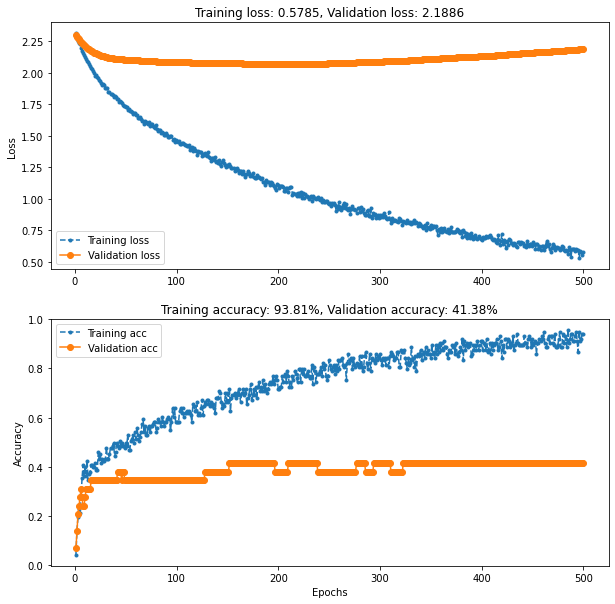

In [17]:
def plot_loss_acc(history):
    """Plot training and (optionally) validation loss and accuracy"""

    loss = history.history['loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(10, 10))

    plt.subplot(2, 1, 1)
    plt.plot(epochs, loss, '.--', label='Training loss')
    final_loss = loss[-1]
    title = 'Training loss: {:.4f}'.format(final_loss)
    plt.ylabel('Loss')
    if 'val_loss' in history.history:
        val_loss = history.history['val_loss']
        plt.plot(epochs, val_loss, 'o-', label='Validation loss')
        final_val_loss = val_loss[-1]
        title += ', Validation loss: {:.4f}'.format(final_val_loss)
    plt.title(title)
    plt.legend()

    acc = history.history['accuracy']

    plt.subplot(2, 1, 2)
    plt.plot(epochs, acc, '.--', label='Training acc')
    final_acc = acc[-1]
    title = 'Training accuracy: {:.2f}%'.format(final_acc * 100)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    if 'val_accuracy' in history.history:
        val_acc = history.history['val_accuracy']
        plt.plot(epochs, val_acc, 'o-', label='Validation acc')
        final_val_acc = val_acc[-1]
        title += ', Validation accuracy: {:.2f}%'.format(final_val_acc * 100)
    plt.title(title)
    plt.legend()

plot_loss_acc(history)

In [18]:
def viz_prediction(df_train, df , df_name):
    """Plot actual vs. good prediction and bad prediction"""
    dfx = df.copy()
    dfx ['good_prediction'] = [1 if x ==y else 0 for x, y in zip(dfx['root_cause_category'],dfx['root_cause_category_predict']) ]
    dfx ['bad_prediction'] = [1 if x !=y else 0 for x, y in zip(dfx['root_cause_category'],dfx['root_cause_category_predict']) ]
    df0 = pd.DataFrame(dfx['root_cause_category'].value_counts())
    df1 = dfx[['root_cause_category','good_prediction']].groupby('root_cause_category').sum()
    df2 = dfx[['root_cause_category_predict','bad_prediction']].groupby('root_cause_category_predict').sum()
    df_idx = pd.DataFrame(df_train['root_cause_category'].value_counts())
    
    df3 = df_idx.join(df0, how='left', lsuffix ='_temp')
    df3  = df3.join(df2, how='left')
    df3  = df3.join(df1, how='left')
    df3.drop('root_cause_category_temp',axis =1 ,inplace =True)
   
    
    nb_total =  len(dfx)
    nb_goodp = df3['good_prediction'].sum()
    nb_badp = df3['bad_prediction'].sum()
    acc = nb_goodp/nb_total

    title = df_name
    title += ', nb input: {}'.format(nb_total)
    title += ', nb good prediction: {}'.format(nb_goodp)
    title +=', Accuracy: {:.2f}%'.format(acc * 100)
    
    df3.plot.bar(figsize=(10,5))
    plt.title(title)
        
    return 

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


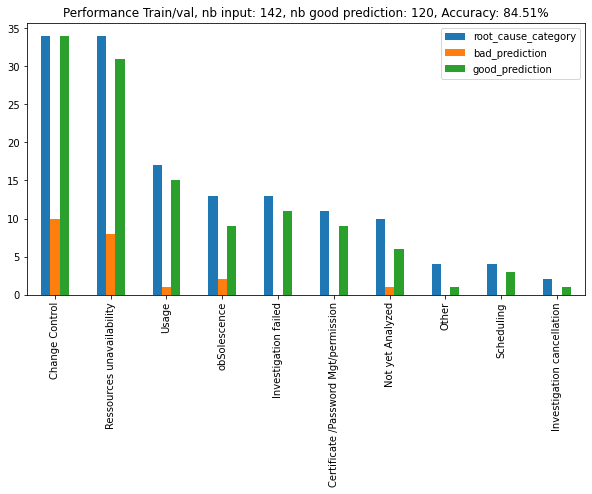

In [19]:
y_train_pred = model.predict_classes(train_data['rca_content_nlp'])
y_train_pred2 = le.inverse_transform (y_train_pred)
y_train_pred2 = pd.DataFrame(y_train_pred2)
y_train_pred2.columns = ['root_cause_category_predict']
train_data2 = train_data.join(pd.DataFrame(y_train_pred2))
viz_prediction(train_data, train_data2, 'Performance Train/val')

## Performance on test dataset
Compute the accuracy for our test dataset

In [20]:
y_test_pred = model.predict_classes(test_data['rca_content_nlp'])

In [21]:
acc=accuracy_score(test_data['root_cause_category_le'], y_test_pred)
print(acc)

0.43333333333333335


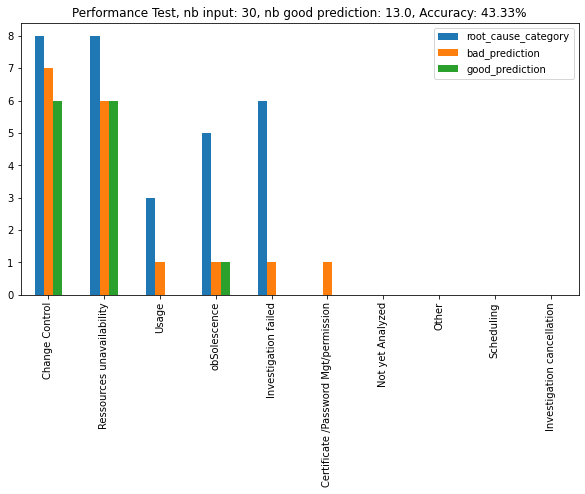

In [22]:
test_data['root_cause_category'] = le.inverse_transform (test_data['root_cause_category_le'])
y_test_pred2 = le.inverse_transform (y_test_pred)
y_test_pred2 = pd.DataFrame(y_test_pred2)
y_test_pred2.columns = ['root_cause_category_predict']
test_data2 = test_data.join(pd.DataFrame(y_test_pred2))
viz_prediction(train_data, test_data2, 'Performance Test')

## create output csv 